In [2]:
import pandas as pd  # type: ignore
import torch  # type: ignore

from src.utils.unitary_linear_norm import unitary_norm

In [269]:
# normalize the RAPs
# read the manifest file

train_manifest = pd.read_csv("./data/noiseReverbSpeech/train_manifest_alt.csv")
test_manifest = pd.read_csv("./data/noiseReverbSpeech/test_manifest_alt.csv")
val_manifest = pd.read_csv("./data/noiseReverbSpeech/val_manifest_alt.csv")

# concat the dataframes
manifest = pd.concat([train_manifest, test_manifest, val_manifest])

In [270]:
train_manifest.insert(33, "real_recording", 0)
val_manifest.insert(33, "real_recording", 0)
test_manifest.insert(33, "real_recording", 0)

In [271]:
train_manifest

,reverbSpeech,cleanSpeech,Th_unitary,Tt_unitary,volume_log10_unitary,Th,Tt,volume,volume_log10,distRcv_norm,...,ALCONS_norm,T60_norm,EDT_norm,C80_norm,C50_norm,D50_norm,TS_norm,azimuth_classifier,elevation_classifier,real_recording
0,reverbSpeech_No4557.wav,clean_No4557.wav,0.0590,0.1208,0.787,0.021,1.127,2706.0,3.432,0.579,...,0.1374,0.1208,0.1664,0.3159,0.3386,0.5502,0.1455,True,True,0
1,reverbSpeech_No35859.wav,clean_No35859.wav,0.1402,0.1519,0.838,0.043,1.368,3600.0,3.556,0.313,...,0.2454,0.1519,0.1977,0.2954,0.3156,0.5052,0.2252,False,False,0
2,reverbSpeech_No10248.wav,clean_No10248.wav,0.0037,0.0118,0.320,0.006,0.280,194.0,2.288,0.018,...,0.0022,0.0118,0.0009,0.9167,0.9132,0.9939,0.0027,True,True,0
3,reverbSpeech_No854.wav,clean_No854.wav,0.0406,0.0297,0.120,0.016,0.419,63.0,1.799,0.042,...,0.0344,0.0297,0.0595,0.6386,0.5918,0.8907,0.0355,True,False,0
4,reverbSpeech_No32368.wav,clean_No32368.wav,0.1587,0.1463,0.780,0.048,1.325,2600.0,3.415,0.402,...,0.1625,0.1463,0.1798,0.3307,0.3724,0.6135,0.2067,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,reverbSpeech_No35686.wav,clean_No35686.wav,0.2768,0.1855,0.838,0.080,1.629,3600.0,3.556,0.306,...,0.2958,0.1855,0.2510,0.2285,0.2449,0.3638,0.2881,False,False,0
43426,reverbSpeech_No24241.wav,clean_No24241.wav,0.3063,0.4960,0.833,0.088,4.042,3500.0,3.544,0.522,...,0.3905,0.4960,0.5161,0.1619,0.2046,0.2858,0.5552,False,False,0
43427,reverbSpeech_No21482.wav,clean_No21482.wav,0.0627,0.0032,0.016,0.022,0.213,35.0,1.544,0.081,...,0.0028,0.0032,0.0326,0.8932,0.7518,0.9663,0.0450,False,False,0
43428,reverbSpeech_No44599.wav,clean_No44599.wav,0.4280,0.1423,0.202,0.121,1.294,100.0,2.000,0.071,...,0.1706,0.1423,0.2087,0.3226,0.3288,0.5309,0.3615,False,False,0


In [272]:
train_manifest.to_csv("./data/noiseReverbSpeech/train_manifest_alt.csv", index=False)
test_manifest.to_csv("./data/noiseReverbSpeech/test_manifest_alt.csv", index=False)
val_manifest.to_csv("./data/noiseReverbSpeech/val_manifest_alt.csv", index=False)

In [198]:
manifest["STI"].to_numpy()

array([0.6012, 0.5125, 0.874 , ..., 0.5334, 0.7469, 0.5954])

In [199]:
sti = manifest["STI"].to_numpy()
alcons = manifest["ALCONS"].to_numpy()
t60 = manifest["T60"].to_numpy()
edt = manifest["EDT"].to_numpy()
c80 = manifest["C80"].to_numpy()
c50 = manifest["C50"].to_numpy()
d50 = manifest["D50"].to_numpy().round(decimals=4)
ts = manifest["TS"].to_numpy()

volume = manifest["volume"].to_numpy()
volume_log10 = manifest["volume_log10"].to_numpy()
dist_src = manifest["distRcv"].to_numpy()
Th = manifest["Th"].to_numpy()
Tt = manifest["Tt"].to_numpy()


sti_norm = unitary_norm(torch.from_numpy(sti)).round(decimals=4).numpy()
alcons_norm = unitary_norm(torch.from_numpy(alcons)).round(decimals=4).numpy()
t60_norm = unitary_norm(torch.from_numpy(t60)).round(decimals=4).numpy()
edt_norm = unitary_norm(torch.from_numpy(edt)).round(decimals=4).numpy()
c80_norm = unitary_norm(torch.from_numpy(c80)).round(decimals=4).numpy()
c50_norm = unitary_norm(torch.from_numpy(c50)).round(decimals=4).numpy()
d50_norm = unitary_norm(torch.from_numpy(d50)).round(decimals=4).numpy()
ts_norm = unitary_norm(torch.from_numpy(ts)).round(decimals=4).numpy()

t60_std = torch.std(torch.from_numpy(t60_norm)).round(decimals=4).numpy()
volume_std = torch.std(torch.from_numpy(volume)).round(decimals=0).numpy()
dist_src_std = torch.std(torch.from_numpy(dist_src)).round(decimals=5).numpy()
volume_log10_std = torch.std(torch.from_numpy(volume_log10)).round(decimals=5).numpy()
Th_std = torch.std(torch.from_numpy(Th)).round(decimals=5).numpy()
Tt_std = torch.std(torch.from_numpy(Tt)).round(decimals=5).numpy()


print(
    "upper bound of sti: ",
    sti.max(),
    "lower bound of sti: ",
    sti.min(),
)
print(
    "upper bound of alcons: ",
    alcons.max(),
    "lower bound of alcons: ",
    alcons.min(),
)
print(
    "upper bound of t60: ",
    t60.max(),
    "lower bound of t60: ",
    t60.min(),
)
print(
    "upper bound of edt: ",
    edt.max(),
    "lower bound of edt: ",
    edt.min(),
)
print(
    "upper bound of c80: ",
    c80.max(),
    "lower bound of c80: ",
    c80.min(),
)
print(
    "upper bound of c50: ",
    c50.max(),
    "lower bound of c50: ",
    c50.min(),
)
print(
    "upper bound of d50: ",
    d50.max(),
    "lower bound of d50: ",
    d50.min(),
)
print(
    "upper bound of ts: ",
    ts.max(),
    "lower bound of ts: ",
    ts.min(),
)
print(
    "upper bound of volume: ",
    volume_log10.max(),
    "lower bound of volume: ",
    volume_log10.min(),
)
print(
    "upper bound of dist_src: ",
    dist_src.max(),
    "lower bound of dist_src: ",
    dist_src.min(),
)


print(
    "standard deviation of t60: ",
    t60_std,
    "\n standard deviation of volume_log10: ",
    volume_log10_std,
    "\nstandard deviation of dist_src: ",
    dist_src_std,
)

upper bound of sti:  0.8843 lower bound of sti:  0.2729
upper bound of alcons:  38.8632 lower bound of alcons:  1.4143
upper bound of t60:  7.958 lower bound of t60:  0.188
upper bound of edt:  6.489 lower bound of edt:  0.016
upper bound of c80:  25.5543 lower bound of c80:  -5.9572
upper bound of c50:  21.8961 lower bound of c50:  -8.4706
upper bound of d50:  0.9936 lower bound of d50:  0.1245
upper bound of ts:  0.4452 lower bound of ts:  0.0034
upper bound of volume:  3.954 lower bound of volume:  1.505
upper bound of dist_src:  28.35 lower bound of dist_src:  0.191
standard deviation of t60:  0.2231 
 standard deviation of volume_log10:  0.67741 
standard deviation of dist_src:  6.29148


In [195]:
Tt_mu = torch.mean(torch.from_numpy(Tt)).round(decimals=5).numpy()
Tt_std = torch.std(torch.from_numpy(Tt)).round(decimals=5).numpy()
print("mean of Tt: ", Tt_mu, "\n standard deviation of Tt: ", Tt_std)

mean of Tt:  1.73133 
 standard deviation of Tt:  1.73343


In [301]:
# read real recordings manifest
train_real_manifest = pd.read_csv(
    "./data/BUT_real_recording_11160samples/real_audio.metadata/train_manifest.csv"
)
val_real_manifest = pd.read_csv(
    "./data/BUT_real_recording_11160samples/real_audio.metadata/val_manifest.csv"
)
test_real_manifest = pd.read_csv(
    "./data/BUT_real_recording_11160samples/real_audio.metadata/test_manifest.csv"
)

# concat the real dataframes with the manifest
real_manifest = pd.concat([train_real_manifest, val_real_manifest, test_real_manifest])

# investigate the upper and lower bounds of the real data
sti_real = real_manifest["STI"].to_numpy()
alcons_real = real_manifest["ALCONS"].to_numpy()
t60_real = real_manifest["T60"].to_numpy()
edt_real = real_manifest["EDT"].to_numpy()
c80_real = real_manifest["C80"].to_numpy()
c50_real = real_manifest["C50"].to_numpy()
d50_real = real_manifest["D50"].to_numpy().round(decimals=4)
ts_real = real_manifest["TS"].to_numpy()
volume_real = real_manifest["volume_log10"].to_numpy()
dist_src_real = real_manifest["distRcv"].to_numpy()
Th_real = real_manifest["Th"].to_numpy()

print(
    "upper bound of sti_real: ",
    sti_real.max(),
    "lower bound of sti_real: ",
    sti_real.min(),
)

print(
    "upper bound of alcons_real: ",
    alcons_real.max(),
    "lower bound of alcons_real: ",
    alcons_real.min(),
)

print(
    "upper bound of t60_real: ",
    t60_real.max(),
    "lower bound of t60_real: ",
    t60_real.min(),
)

print(
    "upper bound of edt_real: ",
    edt_real.max(),
    "lower bound of edt_real: ",
    edt_real.min(),
)

print(
    "upper bound of c80_real: ",
    c80_real.max(),
    "lower bound of c80_real: ",
    c80_real.min(),
)

print(
    "upper bound of c50_real: ",
    c50_real.max(),
    "lower bound of c50_real: ",
    c50_real.min(),
)

print(
    "upper bound of d50_real: ",
    d50_real.max(),
    "lower bound of d50_real: ",
    d50_real.min(),
)

print(
    "upper bound of ts_real: ",
    ts_real.max(),
    "lower bound of ts_real: ",
    ts_real.min(),
)

print(
    "upper bound of volume_real: ",
    volume_real.max(),
    "lower bound of volume_real: ",
    volume_real.min(),
)

print(
    "upper bound of dist_src_real: ",
    dist_src_real.max(),
    "lower bound of dist_src_real: ",
    dist_src_real.min(),
)

upper bound of sti_real:  0.8849 lower bound of sti_real:  0.2997
upper bound of alcons_real:  33.6024 lower bound of alcons_real:  1.4101
upper bound of t60_real:  2.903 lower bound of t60_real:  0.185
upper bound of edt_real:  3.794 lower bound of edt_real:  0.016
upper bound of c80_real:  25.7361 lower bound of c80_real:  -4.7571
upper bound of c50_real:  22.0103 lower bound of c50_real:  -7.3502
upper bound of d50_real:  0.9937 lower bound of d50_real:  0.1555
upper bound of ts_real:  0.3507 lower bound of ts_real:  0.0034
upper bound of volume_real:  3.432 lower bound of volume_real:  1.993
upper bound of dist_src_real:  16.1 lower bound of dist_src_real:  0.604


In [302]:
import numpy as np

STI_real_train = train_real_manifest["STI"].to_numpy()
ALCONS_real_train = train_real_manifest["ALCONS"].to_numpy()
T60_real_train = train_real_manifest["T60"].to_numpy()
EDT_real_train = train_real_manifest["EDT"].to_numpy()
C80_real_train = train_real_manifest["C80"].to_numpy()
C50_real_train = train_real_manifest["C50"].to_numpy()
D50_real_train = train_real_manifest["D50"].to_numpy().round(decimals=4)
TS_real_train = train_real_manifest["TS"].to_numpy()
dist_src_real_train = train_real_manifest["distRcv"].to_numpy()

STI_real_val = val_real_manifest["STI"].to_numpy()
ALCONS_real_val = val_real_manifest["ALCONS"].to_numpy()
T60_real_val = val_real_manifest["T60"].to_numpy()
EDT_real_val = val_real_manifest["EDT"].to_numpy()
C80_real_val = val_real_manifest["C80"].to_numpy()
C50_real_val = val_real_manifest["C50"].to_numpy()
D50_real_val = val_real_manifest["D50"].to_numpy().round(decimals=4)
TS_real_val = val_real_manifest["TS"].to_numpy()
dist_src_real_val = val_real_manifest["distRcv"].to_numpy()

STI_real_test = test_real_manifest["STI"].to_numpy()
ALCONS_real_test = test_real_manifest["ALCONS"].to_numpy()
T60_real_test = test_real_manifest["T60"].to_numpy()
EDT_real_test = test_real_manifest["EDT"].to_numpy()
C80_real_test = test_real_manifest["C80"].to_numpy()
C50_real_test = test_real_manifest["C50"].to_numpy()
D50_real_test = test_real_manifest["D50"].to_numpy().round(decimals=4)
TS_real_test = test_real_manifest["TS"].to_numpy()
dist_src_real_test = test_real_manifest["distRcv"].to_numpy()

norm_ts = lambda x: np.round((x - 0.0034) / (0.4452 - 0.0034), 4)  # noqa: E731
norm_dist_src = lambda x: np.round((x - 0.191) / (28.35 - 0.191), 4)  # noqa: E731
ts_norm_train = norm_ts(TS_real_train)
ts_norm_val = norm_ts(TS_real_val)
ts_norm_test = norm_ts(TS_real_test)

dist_src_norm_train = norm_dist_src(dist_src_real_train)
dist_src_norm_val = norm_dist_src(dist_src_real_val)
dist_src_norm_test = norm_dist_src(dist_src_real_test)

In [303]:
# insert the normalized values into the dataframes
train_real_manifest.insert(21, "TS_norm", ts_norm_train)
train_real_manifest.insert(22, "dist_src_norm", dist_src_norm_train)

val_real_manifest.insert(21, "TS_norm", ts_norm_val)
val_real_manifest.insert(22, "dist_src_norm", dist_src_norm_val)

test_real_manifest.insert(21, "TS_norm", ts_norm_test)
test_real_manifest.insert(22, "dist_src_norm", dist_src_norm_test)

In [304]:
train_real_manifest

,realRecording,RIR,No,librispeech_metainfo,spkID,roomID,Th,Tt,volume,volume_log10,...,STI,ALCONS,T60,EDT,C80,C50,D50,TS,TS_norm,dist_src_norm
0,BUT_realRecording_no4056.wav,BUT_RIR_no102.wav,9,61-70968-0039,SpkID06_20171231_T,rmID_8,0.024,0.551,98.0,1.993,...,0.6960,3.9238,0.551,0.587,8.2111,4.0721,0.7183,0.0460,0.0964,0.1716
1,BUT_realRecording_no3938.wav,BUT_RIR_no99.wav,6,61-70970-0000,SpkID06_20171231_T,rmID_8,0.022,0.519,98.0,1.993,...,0.7147,3.5456,0.519,0.483,10.0299,5.7659,0.7904,0.0359,0.0736,0.1561
2,BUT_realRecording_no139.wav,BUT_RIR_no4.wav,4,121-127105-0005,SpkID07_20170904_T,rmID_6,0.012,0.914,2706.0,3.432,...,0.6254,5.7517,0.914,0.756,9.8545,7.1351,0.8378,0.0248,0.0484,0.1400
3,BUT_realRecording_no5474.wav,BUT_RIR_no137.wav,13,1188-133604-0039,SpkID01_20170818_T,rmID_9,0.010,0.557,107.0,2.029,...,0.7845,2.4289,0.557,0.230,15.1331,12.0500,0.9413,0.0121,0.0197,0.0344
4,BUT_realRecording_no11040.wav,BUT_RIR_no277.wav,29,1089-134691-0019,SpkID01_20170910_T,rmID_11,0.020,0.550,194.0,2.287,...,0.7061,3.7157,0.550,0.523,9.0204,5.3568,0.7742,0.0363,0.0745,0.2586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10039,BUT_realRecording_no9317.wav,BUT_RIR_no233.wav,16,8455-210777-0054,SpkID11_20180110_T,rmID_10,0.043,2.406,231.0,2.363,...,0.4266,16.8953,2.406,2.673,-3.4146,-5.2382,0.2304,0.2106,0.4690,0.1383
10040,BUT_realRecording_no7670.wav,BUT_RIR_no192.wav,6,5683-32866-0023,SpkID10_20180107_T,rmID_10,0.023,1.648,231.0,2.363,...,0.4620,13.9483,1.648,1.529,0.4773,-2.3226,0.3693,0.1103,0.2420,0.1805
10041,BUT_realRecording_no9347.wav,BUT_RIR_no234.wav,17,61-70970-0011,SpkID11_20180110_T,rmID_10,0.026,2.134,231.0,2.363,...,0.4461,15.1997,2.134,1.955,-0.5321,-2.8117,0.3436,0.1378,0.3042,0.2631
10042,BUT_realRecording_no1344.wav,BUT_RIR_no34.wav,3,4992-23283-0000,SpkID01_20171225_T,rmID_8,0.015,0.517,98.0,1.993,...,0.7260,3.3357,0.517,0.467,11.5865,7.9064,0.8606,0.0227,0.0437,0.0449


In [305]:
val_real_manifest

,realRecording,RIR,No,librispeech_metainfo,spkID,roomID,Th,Tt,volume,volume_log10,...,STI,ALCONS,T60,EDT,C80,C50,D50,TS,TS_norm,dist_src_norm
0,BUT_realRecording_no10625.wav,BUT_RIR_no266.wav,18,8455-210777-0068,SpkID01_20170910_T,rmID_11,0.017,0.565,194.0,2.287,...,0.7332,3.2084,0.565,0.526,9.8064,6.3263,0.8102,0.0310,0.0625,0.1688
1,BUT_realRecording_no908.wav,BUT_RIR_no23.wav,23,2961-961-0011,SpkID07_20170904_T,rmID_6,0.033,1.067,2706.0,3.432,...,0.6342,5.4839,1.067,0.828,5.6335,3.8512,0.7082,0.0657,0.1410,0.3503
2,BUT_realRecording_no2663.wav,BUT_RIR_no67.wav,5,4077-13751-0015,SpkID02_20171229_T,rmID_8,0.018,0.555,98.0,1.993,...,0.7034,3.7689,0.555,0.572,10.3355,6.5659,0.8191,0.0267,0.0527,0.0542
3,BUT_realRecording_no8123.wav,BUT_RIR_no204.wav,18,3575-170457-0026,SpkID10_20180107_T,rmID_10,0.051,2.063,231.0,2.363,...,0.4217,17.3510,2.063,2.054,-2.6757,-5.1603,0.2336,0.1827,0.4058,0.1398
4,BUT_realRecording_no5988.wav,BUT_RIR_no150.wav,26,6930-81414-0010,SpkID01_20170818_T,rmID_9,0.017,0.660,107.0,2.029,...,0.6779,4.3288,0.660,0.666,8.1203,4.9198,0.7562,0.0356,0.0729,0.0685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,BUT_realRecording_no10723.wav,BUT_RIR_no269.wav,21,237-126133-0006,SpkID01_20170910_T,rmID_11,0.016,0.503,194.0,2.287,...,0.7585,2.7973,0.503,0.410,12.0151,8.0721,0.8641,0.0242,0.0471,0.0904
554,BUT_realRecording_no2832.wav,BUT_RIR_no71.wav,9,8463-287645-0005,SpkID02_20171229_T,rmID_8,0.024,0.595,98.0,1.993,...,0.6910,4.0327,0.595,0.604,7.3643,3.3861,0.6851,0.0448,0.0937,0.0959
555,BUT_realRecording_no2011.wav,BUT_RIR_no51.wav,20,6930-81414-0010,SpkID01_20171225_T,rmID_8,0.017,0.569,98.0,1.993,...,0.7399,3.0933,0.569,0.501,9.4946,5.7572,0.7899,0.0308,0.0620,0.0195
556,BUT_realRecording_no1162.wav,BUT_RIR_no30.wav,30,4446-2273-0024,SpkID07_20170904_T,rmID_6,0.020,0.956,2706.0,3.432,...,0.6260,5.7354,0.956,0.806,6.2854,3.4087,0.6866,0.0443,0.0926,0.3503


In [297]:
test_real_manifest

,realRecording,RIR,No,librispeech_metainfo,spkID,roomID,Th,Tt,volume,volume_log10,...,STI,ALCONS,T60,EDT,C80,C50,D50,TS,TS_norm,dist_src_norm
0,BUT_realRecording_no9506.wav,BUT_RIR_no238.wav,21,260-123288-0008,SpkID11_20180110_T,rmID_10,0.081,2.593,231.0,2.363,...,0.3447,26.3357,2.593,3.036,-4.7571,-6.8234,0.1721,0.2658,0.5939,0.2386
1,BUT_realRecording_no7827.wav,BUT_RIR_no196.wav,10,1284-134647-0007,SpkID10_20180107_T,rmID_10,0.022,1.842,231.0,2.363,...,0.4661,13.6365,1.842,1.741,0.4230,-1.8776,0.3932,0.1173,0.2578,0.1745
2,BUT_realRecording_no6652.wav,BUT_RIR_no167.wav,12,3570-5696-0002,SpkID02_20170820_T,rmID_9,0.025,0.585,107.0,2.029,...,0.7041,3.7564,0.585,0.651,6.9347,3.9811,0.7142,0.0507,0.1071,0.0901
3,BUT_realRecording_no7115.wav,BUT_RIR_no178.wav,23,672-122797-0041,SpkID02_20170820_T,rmID_9,0.024,0.715,107.0,2.029,...,0.6653,4.6353,0.715,0.694,6.2292,2.1731,0.6224,0.0535,0.1134,0.0862
4,BUT_realRecording_no6683.wav,BUT_RIR_no168.wav,13,3570-5695-0005,SpkID02_20170820_T,rmID_9,0.015,0.639,107.0,2.029,...,0.7278,3.3034,0.639,0.515,10.4186,6.9051,0.8306,0.0276,0.0548,0.0585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,BUT_realRecording_no1846.wav,BUT_RIR_no47.wav,16,672-122797-0061,SpkID01_20171225_T,rmID_8,0.021,0.633,98.0,1.993,...,0.7080,3.6775,0.633,0.578,8.1553,3.8765,0.7091,0.0442,0.0923,0.0803
554,BUT_realRecording_no10912.wav,BUT_RIR_no273.wav,25,672-122797-0058,SpkID01_20170910_T,rmID_11,0.018,0.541,194.0,2.287,...,0.7303,3.2577,0.541,0.524,9.5529,5.5141,0.7806,0.0353,0.0722,0.0895
555,BUT_realRecording_no1052.wav,BUT_RIR_no27.wav,27,3729-6852-0025,SpkID07_20170904_T,rmID_6,0.028,1.112,2706.0,3.432,...,0.5888,7.0135,1.112,1.098,3.4780,1.4534,0.5828,0.0799,0.1732,0.5650
556,BUT_realRecording_no3983.wav,BUT_RIR_no100.wav,7,1089-134686-0014,SpkID06_20171231_T,rmID_8,0.021,0.512,98.0,1.993,...,0.7089,3.6599,0.512,0.532,9.2580,5.1363,0.7653,0.0375,0.0772,0.1569


In [307]:
train_real_manifest.insert(23, "real_recording", 1)
val_real_manifest.insert(23, "real_recording", 1)
test_real_manifest.insert(23, "real_recording", 1)

In [308]:
train_real_manifest

,realRecording,RIR,No,librispeech_metainfo,spkID,roomID,Th,Tt,volume,volume_log10,...,ALCONS,T60,EDT,C80,C50,D50,TS,TS_norm,dist_src_norm,real_recording
0,BUT_realRecording_no4056.wav,BUT_RIR_no102.wav,9,61-70968-0039,SpkID06_20171231_T,rmID_8,0.024,0.551,98.0,1.993,...,3.9238,0.551,0.587,8.2111,4.0721,0.7183,0.0460,0.0964,0.1716,1
1,BUT_realRecording_no3938.wav,BUT_RIR_no99.wav,6,61-70970-0000,SpkID06_20171231_T,rmID_8,0.022,0.519,98.0,1.993,...,3.5456,0.519,0.483,10.0299,5.7659,0.7904,0.0359,0.0736,0.1561,1
2,BUT_realRecording_no139.wav,BUT_RIR_no4.wav,4,121-127105-0005,SpkID07_20170904_T,rmID_6,0.012,0.914,2706.0,3.432,...,5.7517,0.914,0.756,9.8545,7.1351,0.8378,0.0248,0.0484,0.1400,1
3,BUT_realRecording_no5474.wav,BUT_RIR_no137.wav,13,1188-133604-0039,SpkID01_20170818_T,rmID_9,0.010,0.557,107.0,2.029,...,2.4289,0.557,0.230,15.1331,12.0500,0.9413,0.0121,0.0197,0.0344,1
4,BUT_realRecording_no11040.wav,BUT_RIR_no277.wav,29,1089-134691-0019,SpkID01_20170910_T,rmID_11,0.020,0.550,194.0,2.287,...,3.7157,0.550,0.523,9.0204,5.3568,0.7742,0.0363,0.0745,0.2586,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10039,BUT_realRecording_no9317.wav,BUT_RIR_no233.wav,16,8455-210777-0054,SpkID11_20180110_T,rmID_10,0.043,2.406,231.0,2.363,...,16.8953,2.406,2.673,-3.4146,-5.2382,0.2304,0.2106,0.4690,0.1383,1
10040,BUT_realRecording_no7670.wav,BUT_RIR_no192.wav,6,5683-32866-0023,SpkID10_20180107_T,rmID_10,0.023,1.648,231.0,2.363,...,13.9483,1.648,1.529,0.4773,-2.3226,0.3693,0.1103,0.2420,0.1805,1
10041,BUT_realRecording_no9347.wav,BUT_RIR_no234.wav,17,61-70970-0011,SpkID11_20180110_T,rmID_10,0.026,2.134,231.0,2.363,...,15.1997,2.134,1.955,-0.5321,-2.8117,0.3436,0.1378,0.3042,0.2631,1
10042,BUT_realRecording_no1344.wav,BUT_RIR_no34.wav,3,4992-23283-0000,SpkID01_20171225_T,rmID_8,0.015,0.517,98.0,1.993,...,3.3357,0.517,0.467,11.5865,7.9064,0.8606,0.0227,0.0437,0.0449,1


In [309]:
# update the manifest files
train_real_manifest.to_csv(
    "./data/BUT_real_recording_11160samples/real_audio.metadata/train_manifest.csv",
    index=False,
)
val_real_manifest.to_csv(
    "./data/BUT_real_recording_11160samples/real_audio.metadata/val_manifest.csv",
    index=False,
)
test_real_manifest.to_csv(
    "./data/BUT_real_recording_11160samples/real_audio.metadata/test_manifest.csv",
    index=False,
)

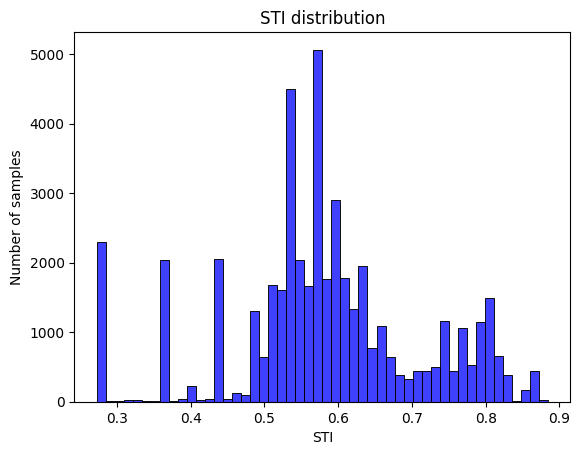

In [169]:
# plot the histograms
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
plt.rcParams["font.family"] = "serif"
sns.histplot(sti, bins=50, color="blue", ax=ax)
ax.set_title("STI distribution")
ax.set_xlabel("STI")
ax.set_ylabel("Number of samples")
plt.show()

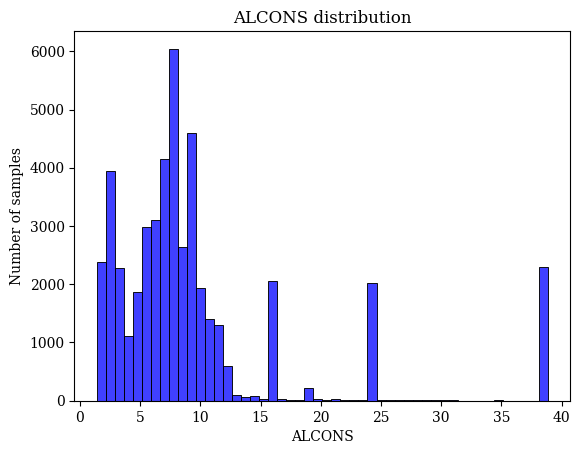

In [170]:
# plot the histograms
fig, ax = plt.subplots()
plt.rcParams["font.family"] = "serif"
sns.histplot(alcons, bins=50, color="blue", ax=ax)
ax.set_title("ALCONS distribution")
ax.set_xlabel("ALCONS")
ax.set_ylabel("Number of samples")
plt.show()

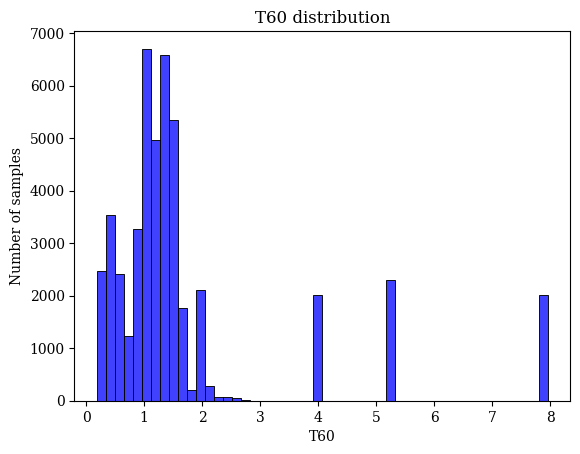

In [171]:
# plot the histograms
fig, ax = plt.subplots()
plt.rcParams["font.family"] = "serif"
sns.histplot(t60, bins=50, color="blue", ax=ax)
ax.set_title("T60 distribution")
ax.set_xlabel("T60")
ax.set_ylabel("Number of samples")
plt.show()

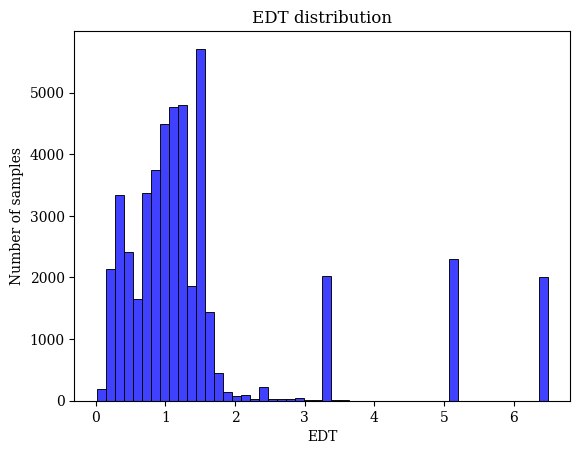

In [172]:
# plot the histograms
fig, ax = plt.subplots()
plt.rcParams["font.family"] = "serif"
sns.histplot(edt, bins=50, color="blue", ax=ax)
ax.set_title("EDT distribution")
ax.set_xlabel("EDT")
ax.set_ylabel("Number of samples")
plt.show()

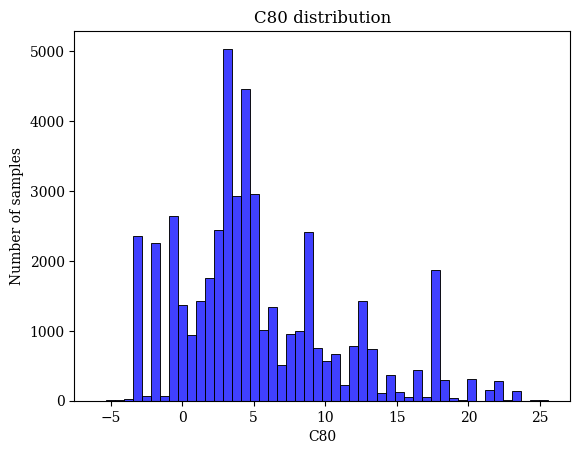

In [173]:
# plot the histograms
fig, ax = plt.subplots()
plt.rcParams["font.family"] = "serif"
sns.histplot(c80, bins=50, color="blue", ax=ax)
ax.set_title("C80 distribution")
ax.set_xlabel("C80")
ax.set_ylabel("Number of samples")
plt.show()

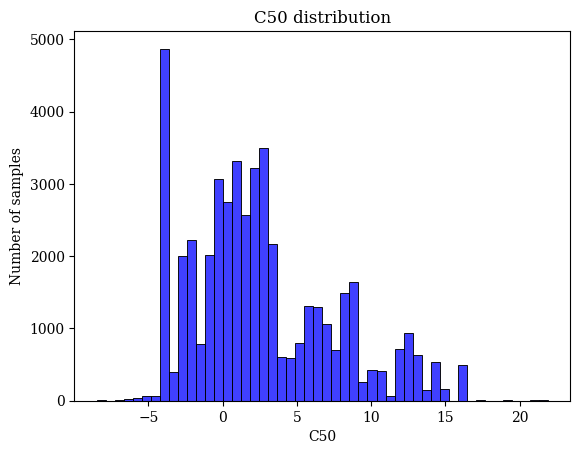

In [174]:
# plot the histograms
fig, ax = plt.subplots()
plt.rcParams["font.family"] = "serif"
sns.histplot(c50, bins=50, color="blue", ax=ax)
ax.set_title("C50 distribution")
ax.set_xlabel("C50")
ax.set_ylabel("Number of samples")
plt.show()

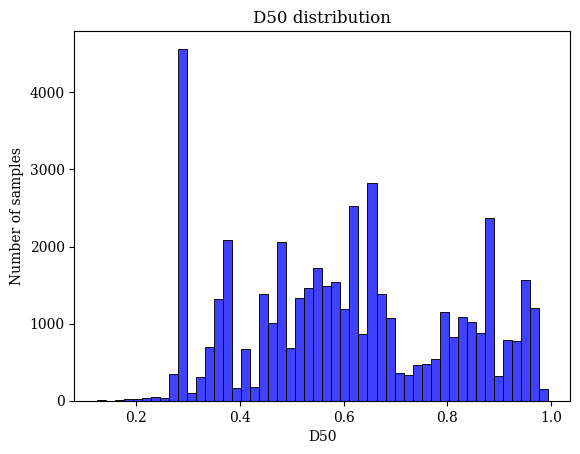

In [175]:
# plot the histograms
fig, ax = plt.subplots()
plt.rcParams["font.family"] = "serif"
sns.histplot(d50, bins=50, color="blue", ax=ax)
ax.set_title("D50 distribution")
ax.set_xlabel("D50")
ax.set_ylabel("Number of samples")
plt.show()

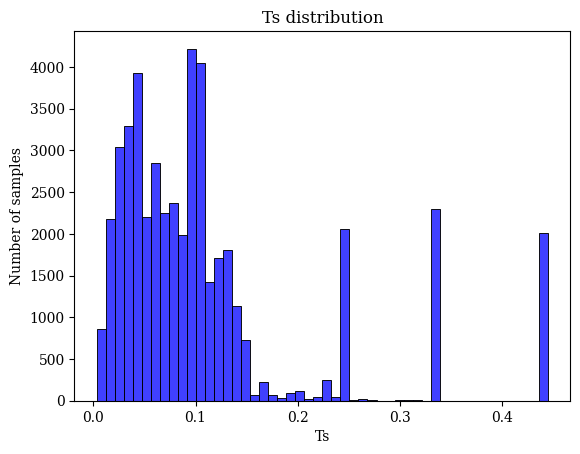

In [205]:
# plot the histograms
fig, ax = plt.subplots()
plt.rcParams["font.family"] = "serif"
sns.histplot(ts, bins=50, color="blue", ax=ax)
ax.set_title("Ts distribution")
ax.set_xlabel("Ts")
ax.set_ylabel("Number of samples")
plt.show()

In [203]:
manifest

,reverbSpeech,cleanSpeech,Th_unitary,Tt_unitary,volume_log10_unitary,Th,Tt,volume,volume_log10,distRcv_norm,...,STI,ALCONS,T60,EDT,C80,C50,D50,TS,azimuth_classifier,elevation_classifier
0,reverbSpeech_No4557.wav,clean_No4557.wav,0.0590,0.1208,0.787,0.021,1.127,2706.0,3.432,0.579,...,0.6012,6.5598,1.127,1.093,3.9976,1.8124,0.6027,0.0677,True,True
1,reverbSpeech_No35859.wav,clean_No35859.wav,0.1402,0.1519,0.838,0.043,1.368,3600.0,3.556,0.313,...,0.5125,10.6044,1.368,1.296,3.3528,1.1122,0.5636,0.1029,False,False
2,reverbSpeech_No10248.wav,clean_No10248.wav,0.0037,0.0118,0.320,0.006,0.280,194.0,2.288,0.018,...,0.8740,1.4954,0.280,0.022,22.9306,19.2600,0.9883,0.0046,True,True
3,reverbSpeech_No854.wav,clean_No854.wav,0.0406,0.0297,0.120,0.016,0.419,63.0,1.799,0.042,...,0.7648,2.7030,0.419,0.401,14.1647,9.4998,0.8986,0.0191,True,False
4,reverbSpeech_No32368.wav,clean_No32368.wav,0.1587,0.1463,0.780,0.048,1.325,2600.0,3.415,0.402,...,0.5764,7.5016,1.325,1.180,4.4650,2.8391,0.6577,0.0947,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,reverbSpeech_No19531.wav,clean_No19531.wav,0.0406,0.1054,0.593,0.016,1.007,908.0,2.958,0.075,...,0.5953,6.7733,1.007,0.982,3.4110,1.0954,0.5626,0.0668,False,False
1996,reverbSpeech_No40752.wav,clean_No40752.wav,0.3321,1.0000,0.877,0.095,7.958,4500.0,3.653,1.000,...,0.3594,24.3223,7.958,6.489,-1.9161,-4.0491,0.2824,0.4452,False,False
1997,reverbSpeech_No43672.wav,clean_No43672.wav,0.1144,0.2279,0.833,0.036,1.959,3500.0,3.544,0.308,...,0.5334,9.4717,1.959,1.455,3.5548,2.0576,0.6163,0.1022,False,False
1998,reverbSpeech_No11001.wav,clean_No11001.wav,0.0295,0.0669,0.146,0.013,0.708,73.0,1.863,0.096,...,0.7469,2.9777,0.708,0.403,11.7934,8.8841,0.8855,0.0210,True,False


In [206]:
# insert the normalized values into the manifest
manifest.insert(23, "STI_norm", sti_norm)
manifest.insert(24, "ALCONS_norm", alcons_norm)
manifest.insert(25, "T60_norm", t60_norm)
manifest.insert(26, "EDT_norm", edt_norm)
manifest.insert(27, "C80_norm", c80_norm)
manifest.insert(28, "C50_norm", c50_norm)
manifest.insert(29, "D50_norm", d50_norm)
manifest.insert(30, "TS_norm", ts_norm)

In [207]:
manifest

,reverbSpeech,cleanSpeech,Th_unitary,Tt_unitary,volume_log10_unitary,Th,Tt,volume,volume_log10,distRcv_norm,...,STI_norm,ALCONS_norm,T60_norm,EDT_norm,C80_norm,C50_norm,D50_norm,TS_norm,azimuth_classifier,elevation_classifier
0,reverbSpeech_No4557.wav,clean_No4557.wav,0.0590,0.1208,0.787,0.021,1.127,2706.0,3.432,0.579,...,0.5370,0.1374,0.1208,0.1664,0.3159,0.3386,0.5502,0.1455,True,True
1,reverbSpeech_No35859.wav,clean_No35859.wav,0.1402,0.1519,0.838,0.043,1.368,3600.0,3.556,0.313,...,0.3919,0.2454,0.1519,0.1977,0.2954,0.3156,0.5052,0.2252,False,False
2,reverbSpeech_No10248.wav,clean_No10248.wav,0.0037,0.0118,0.320,0.006,0.280,194.0,2.288,0.018,...,0.9832,0.0022,0.0118,0.0009,0.9167,0.9132,0.9939,0.0027,True,True
3,reverbSpeech_No854.wav,clean_No854.wav,0.0406,0.0297,0.120,0.016,0.419,63.0,1.799,0.042,...,0.8045,0.0344,0.0297,0.0595,0.6386,0.5918,0.8907,0.0355,True,False
4,reverbSpeech_No32368.wav,clean_No32368.wav,0.1587,0.1463,0.780,0.048,1.325,2600.0,3.415,0.402,...,0.4964,0.1625,0.1463,0.1798,0.3307,0.3724,0.6135,0.2067,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,reverbSpeech_No19531.wav,clean_No19531.wav,0.0406,0.1054,0.593,0.016,1.007,908.0,2.958,0.075,...,0.5273,0.1431,0.1054,0.1492,0.2973,0.3150,0.5041,0.1435,False,False
1996,reverbSpeech_No40752.wav,clean_No40752.wav,0.3321,1.0000,0.877,0.095,7.958,4500.0,3.653,1.000,...,0.1415,0.6117,1.0000,1.0000,0.1282,0.1456,0.1817,1.0000,False,False
1997,reverbSpeech_No43672.wav,clean_No43672.wav,0.1144,0.2279,0.833,0.036,1.959,3500.0,3.544,0.308,...,0.4261,0.2152,0.2279,0.2223,0.3019,0.3467,0.5659,0.2236,False,False
1998,reverbSpeech_No11001.wav,clean_No11001.wav,0.0295,0.0669,0.146,0.013,0.708,73.0,1.863,0.096,...,0.7753,0.0417,0.0669,0.0598,0.5633,0.5715,0.8756,0.0398,True,False


In [179]:
train_manifest["D50"]

0        0.6027
1        0.5636
2        0.9883
3        0.8986
4        0.6577
          ...  
43425    0.4407
43426    0.3729
43427    0.9643
43428    0.5859
43429    0.5084
Name: D50, Length: 43430, dtype: float64

In [208]:
# split again the manifest into train, test and val
train_manifest_ = manifest[: len(train_manifest)]
test_manifest_ = manifest[
    len(train_manifest) : len(train_manifest) + len(test_manifest)
]
val_manifest_ = manifest[len(train_manifest) + len(test_manifest) :]

In [209]:
train_manifest_.to_csv("./data/noiseReverbSpeech/train_manifest_alt.csv", index=False)

In [210]:
test_manifest_.to_csv("./data/noiseReverbSpeech/test_manifest_alt.csv", index=False)

In [211]:
val_manifest_.to_csv("./data/noiseReverbSpeech/val_manifest_alt.csv", index=False)

In [188]:
# get the real-recorded data path list
import os
from pathlib import Path

real_recording_path = "/home/lucianius/Data/Datasets/Librispeech_test_clean_retransmission/VUT_FIT_D105/MicID01/SpkID07_20170904_T/01/english/LibriSpeech/test-clean/"
librispeech_folder = Path(real_recording_path)
extension = ".wav"
matching_files = librispeech_folder.rglob(f"*{extension}")
matching_files = [str(x) for x in matching_files]
# sort the files
matching_files.sort()

In [189]:
len(matching_files)

2620

In [190]:
import random

from src.preprocessing.RIRutils import checkfolder_BUT

In [191]:
path_retrans = "/home/lucianius/Data/Datasets/Librispeech_test_clean_retransmission"
path_rir = "/home/lucianius/Data/Datasets/BUT_ReverbDB"
num_files = 10
j = 0
n = 0
folderNos = [4, 6, 7, 8, 9]
ThTtDistRcvOriSrc_label = []
random.seed(3407)
for folderNo in folderNos:
    print("Processing folder " + str(folderNo) + "...")
    path_ = path_retrans + checkfolder_BUT(folderNo)
    lst = os.listdir(path_)
    lst.sort()
    path = path_rir + checkfolder_BUT(folderNo)
    for foldername in lst:
        if foldername.startswith("SpkID"):
            print("Processing speaker " + foldername + "...")
            for i in range(1, 32):
                retransed_path = os.path.join(
                    path_,
                    foldername,
                    str(i).zfill(2),
                    "english/LibriSpeech/test-clean/",
                )
                librispeech_folder = Path(retransed_path)
                extension = ".wav"
                matching_files = librispeech_folder.rglob(f"*{extension}")
                matching_files = [str(x) for x in matching_files]
                # sort the files
                matching_files.sort()
                # randomly choose some audio file
                # real_audio_paths = random.sample(matching_files, num_files)

                real_audio_paths = matching_files[j * num_files : (j + 1) * num_files]
                if len(real_audio_paths) < num_files:
                    # handle the last batch
                    real_audio_paths = random.sample(matching_files, num_files)
                print(real_audio_paths)
                j += 1

Processing folder 4...
Processing speaker SpkID07_20170904_T...
['/home/lucianius/Data/Datasets/Librispeech_test_clean_retransmission/VUT_FIT_D105/MicID01/SpkID07_20170904_T/01/english/LibriSpeech/test-clean/1089/134686/1089-134686-0000.v00.wav', '/home/lucianius/Data/Datasets/Librispeech_test_clean_retransmission/VUT_FIT_D105/MicID01/SpkID07_20170904_T/01/english/LibriSpeech/test-clean/1089/134686/1089-134686-0001.v00.wav', '/home/lucianius/Data/Datasets/Librispeech_test_clean_retransmission/VUT_FIT_D105/MicID01/SpkID07_20170904_T/01/english/LibriSpeech/test-clean/1089/134686/1089-134686-0002.v00.wav', '/home/lucianius/Data/Datasets/Librispeech_test_clean_retransmission/VUT_FIT_D105/MicID01/SpkID07_20170904_T/01/english/LibriSpeech/test-clean/1089/134686/1089-134686-0003.v00.wav', '/home/lucianius/Data/Datasets/Librispeech_test_clean_retransmission/VUT_FIT_D105/MicID01/SpkID07_20170904_T/01/english/LibriSpeech/test-clean/1089/134686/1089-134686-0004.v00.wav', '/home/lucianius/Data/Dat